## *Data Preprocessing*

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [29]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df.shape

(768, 9)

In [31]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


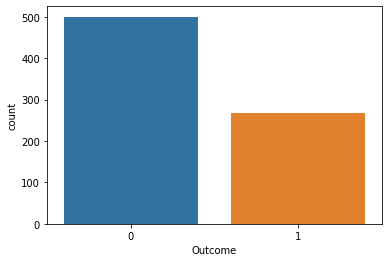

In [32]:
sns.countplot(df['Outcome'], label="Count")

In [33]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


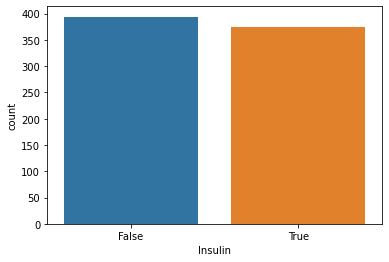

In [34]:
sns.countplot(df['Insulin']==0, label="Count")

In [35]:
x = df.iloc[:,0:8]
y = df.Outcome
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [36]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## *Random Forest*

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(criterion='gini', max_depth=4, max_features='auto', min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=55, random_state=None)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=55,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rf.score(x_train, y_train)

0.8224755700325733

In [41]:
pred1 = rf.predict(x_test)
print(pred1)

[0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [42]:
score1 = rf.score(x_train,y_train) * 100
print(score1)

82.24755700325733


In [43]:
result = confusion_matrix(y_test, pred1)
print ('Confusion Matrix :')
print(result) 

Confusion Matrix :
[[86 13]
 [23 32]]


In [44]:
print ('Accuracy Score :',accuracy_score(y_test, pred1)) 
print ('Report : ')
print ("Classification Report:\n",classification_report(y_test, pred1)) 

Accuracy Score : 0.7662337662337663
Report : 
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



## *Decision Tree*

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_split=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
print(dt.score(x_train,y_train))

0.7768729641693811


In [48]:
pred2 = dt.predict(x_test)  
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [49]:
score2 = dt.score(x_train,y_train) * 100
score2

77.68729641693811

In [50]:
result2 = confusion_matrix(y_test, pred2)
print ('Confusion Matrix :')
print(result2) 

Confusion Matrix :
[[83 16]
 [21 34]]


In [51]:
print ('Accuracy Score :',accuracy_score(y_test, pred2)) 
print ('Report : ')
print ("Classification Report:\n",classification_report(y_test, pred2)) 

Accuracy Score : 0.7597402597402597
Report : 
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



## *SVM*

In [52]:
from sklearn.svm import SVC
obj=SVC(kernel='linear')
obj.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
obj.score(x_train,y_train)*100

77.19869706840392

In [54]:
pred3 = dt.predict(x_test)  
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [55]:
score3 = obj.score(x_train,y_train) * 100
score3

77.19869706840392

In [56]:
result3 = confusion_matrix(y_test, pred3)
print ('Confusion Matrix :')
print(result3) 

Confusion Matrix :
[[83 16]
 [21 34]]


In [57]:
print ('Accuracy Score :',accuracy_score(y_test, pred3)) 
print ('Report : ')
print ("Classification Report:\n",classification_report(y_test, pred3)) 

Accuracy Score : 0.7597402597402597
Report : 
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



## *K-Means*

In [58]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


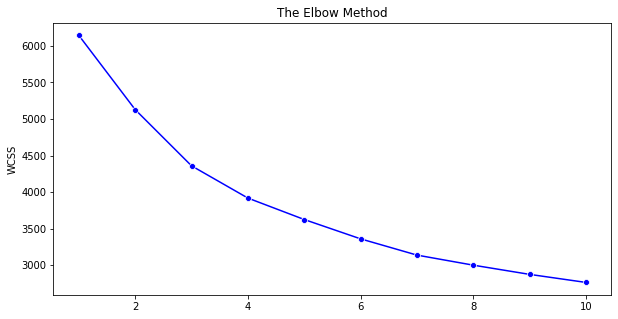

In [59]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='blue')
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.show()

In [60]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', random_state = 42)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [61]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0,
       2, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1,
       2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1,
       2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2,
       0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0,

In [62]:
score4 = metrics.accuracy_score(y,y_kmeans)*100
score4

51.692708333333336

In [63]:
confusion_matrix(y, y_kmeans)

array([[287, 106, 107],
       [ 50, 110, 108],
       [  0,   0,   0]])

In [64]:
print ('Accuracy Score :',accuracy_score(y, y_kmeans)) 
print ('Report : ')
print ("Classification Report:\n",classification_report(y, y_kmeans)) 

Accuracy Score : 0.5169270833333334
Report : 
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.57      0.69       500
           1       0.51      0.41      0.45       268
           2       0.00      0.00      0.00         0

    accuracy                           0.52       768
   macro avg       0.45      0.33      0.38       768
weighted avg       0.73      0.52      0.61       768



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## *KNN*

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [67]:
pred5 = knn.predict(x_test)
pred5

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [68]:
score5 = metrics.accuracy_score(y_test,pred5)*100
score5

68.18181818181817

In [69]:
confusion_matrix(y_test, pred5)

array([[80, 19],
       [30, 25]])

In [70]:
print ('Accuracy Score :',accuracy_score(y_test, pred5)) 
print ('Report : ')
print ("Classification Report:\n",classification_report(y_test, pred5)) 

Accuracy Score : 0.6818181818181818
Report : 
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77        99
           1       0.57      0.45      0.51        55

    accuracy                           0.68       154
   macro avg       0.65      0.63      0.64       154
weighted avg       0.67      0.68      0.67       154



<BarContainer object of 5 artists>

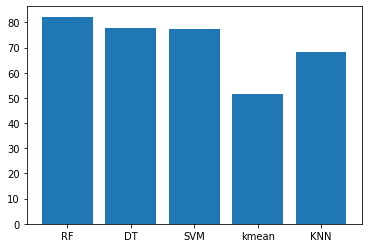

In [71]:
algo = ['RF','DT','SVM','kmean','KNN'] 
accuracy = [score1,score2,score3,score4,score5] 
plt.bar(algo,accuracy)

## **Frequently Asked Questions**

Q1. What do you think are the criteria to say whether a developed data model is good or not?

Ans- Below are a few criteria which I think are a must to be considered to decide whether a developed data model is good or not:

1. A model developed for the dataset should have predictable performance. This is required to predict the future.

2. A model is said to be a good model if it can easily adapt to changes according to business requirements.
    
3. If the data gets changed, the model should be able to scale according to the data.

4. The model developed should also be able to easily consumed by the clients for actionable and profitable results.

Q2.  When do you think you should retrain a model? Is it dependent on the data?

Ans- Business data keeps changing on a day-to-day basis, but the format doesn’t change. As and when a business operation enters a new market, sees a sudden rise of opposition or sees its own position rising or falling, it is recommended to retrain the model. So, as and when the business dynamics change, it is recommended to retrain the model with the changing behaviors of customers.

Q3. Why should we use Random Forest Algorithm?

Ans- There are a lot of benefits to using Random Forest Algorithm, but one of the main advantages is that it reduces the risk of overfitting and the required training time. Additionally, it offers a high level of accuracy. Random Forest algorithm runs efficiently in large databases and produces highly accurate predictions by estimating missing data.

